In [325]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [326]:
data=pd.read_csv('/content/drive/MyDrive/Benchmark_BinaryML.csv')

In [327]:
data.head()

,PDBid,Sequence,envelope,lumen,plastoglobule,stroma,thylakoid_membrane,Sum,Length
0,Q2QD41,MIFSTFEHILTHISFSVISIVITIQLITLLINETVGLYVSSEKGMI...,0,0,0,0,1,1,323
1,Q9LIK0,MSQSIQFSTPSHTPHLLHLPHSQFNRPLSSISFRRFPLTTIKYTSI...,0,0,0,1,0,1,596
2,Q41643,MALAQKVASRPAVASRRGVVVVRASVESRRAVLGGLLASTVVALTS...,0,0,0,0,1,1,202
3,Q8WHX1,MIGRLYMKKLKNLFLFLSSLCPVFPWISQISLVMPFGLYYGFLTAL...,1,0,0,0,0,1,1703
4,O19901,MEQYILKLENSINILAFLGALVSSLFYWAKLTYYKQIQVFSLPKFC...,0,0,0,0,1,1,293


# EDA


In [328]:
columns=list(data.columns[2:7])

In [329]:
values=list(data.iloc[:,2:7].sum().values)

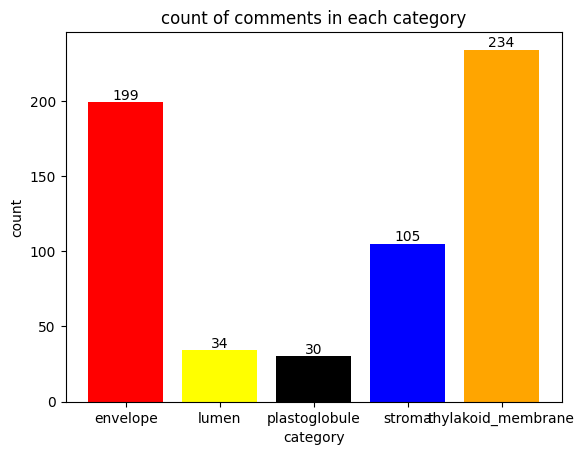

In [330]:
c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(columns,values,color=c)
for i, count in enumerate(values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('count of comments in each category')
plt.xlabel('category')
plt.ylabel('count')
plt.savefig('plot.png')
plt.show()

#counting number of sequences which belongs to multiple label

In [331]:
value=data.iloc[:,2:7].sum(axis=1)

In [332]:
labels_count=value.value_counts()

In [333]:
labels=list(labels_count.index)
for i in range(len(labels)):
  labels[i]=str(labels[i])

In [334]:
counts=list(labels_count.iloc[:])

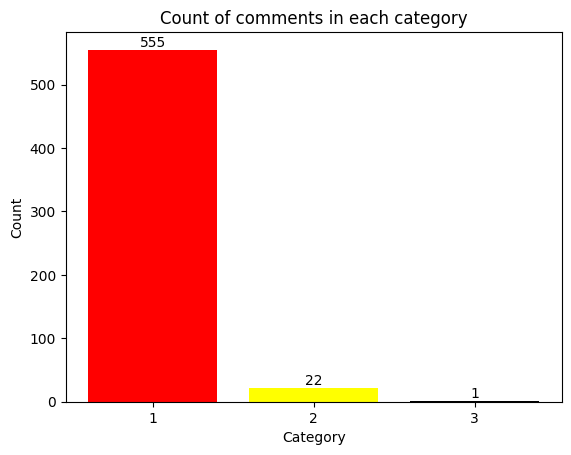

In [335]:
c = ['red', 'yellow', 'black']
plt.bar(labels, counts, color=c)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Count of comments in each category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [336]:
def generate_kmers(dna_sequence, k):
    kmers = []
    sequence_length = len(dna_sequence)

    for i in range(sequence_length - k + 1):
        kmer = dna_sequence[i:i + k]
        kmers.append(kmer)

    return ' '.join(kmers)

In [337]:
data['kmers'] = data['Sequence'].apply(lambda x: generate_kmers(x, 3))

In [338]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn import model_selection
from tensorflow.keras.regularizers import L2

In [339]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(data['kmers'],data.iloc[:,2:7],test_size=0.2)

In [340]:
max_features = 1000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train)

In [341]:
train_sequences = tokenizer.texts_to_sequences(X_train.values)
test_sequences = tokenizer.texts_to_sequences(X_test.values)

In [342]:
max_length = 300 # Maximum length of sequences
X_train = pad_sequences(train_sequences, maxlen=max_length)
X_test = pad_sequences(test_sequences, maxlen=max_length)

In [343]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    baseline=None,
    restore_best_weights=True
)

In [344]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(64, activation='relu',kernel_regularizer=L2(0.01)))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [345]:
history=model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=[X_test, Y_test],callbacks=[early_stopping],use_multiprocessing=True)

Epoch 1/100
8/8 [==============================] - 6s 206ms/step - loss: 1.4912 - accuracy: 0.2468 - val_loss: 1.3983 - val_accuracy: 0.4310
Epoch 2/100
8/8 [==============================] - 0s 50ms/step - loss: 1.2535 - accuracy: 0.3896 - val_loss: 1.0916 - val_accuracy: 0.4052
Epoch 3/100
8/8 [==============================] - 0s 46ms/step - loss: 1.0700 - accuracy: 0.3745 - val_loss: 0.9916 - val_accuracy: 0.4052
Epoch 4/100
8/8 [==============================] - 0s 40ms/step - loss: 0.9945 - accuracy: 0.3745 - val_loss: 0.9179 - val_accuracy: 0.4052
Epoch 5/100
8/8 [==============================] - 0s 38ms/step - loss: 0.9246 - accuracy: 0.3745 - val_loss: 0.8563 - val_accuracy: 0.4052
Epoch 6/100
8/8 [==============================] - 0s 41ms/step - loss: 0.8623 - accuracy: 0.3745 - val_loss: 0.8039 - val_accuracy: 0.4052
Epoch 7/100
8/8 [==============================] - 0s 46ms/step - loss: 0.8089 - accuracy: 0.3874 - val_loss: 0.7549 - val_accuracy: 0.4052
Epoch 8/100
8/8 [==

In [346]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


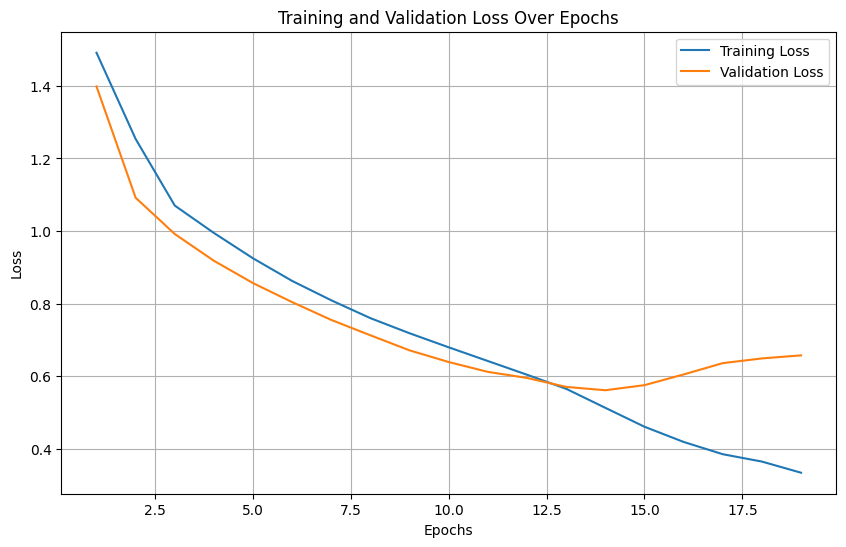

In [347]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [348]:
Y_pred=model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [350]:
y_pred = np.round(Y_pred)

In [351]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.25862068965517243


In [352]:
print(classification_report(Y_test,y_pred,target_names=['envelope',	'lumen',	'plastoglobule',	'stroma',	'thylakoid_membrane']))

                    precision    recall  f1-score   support

          envelope       0.80      0.19      0.30        43
             lumen       0.00      0.00      0.00         5
     plastoglobule       0.00      0.00      0.00         2
            stroma       0.00      0.00      0.00        21
thylakoid_membrane       0.47      0.48      0.47        48

         micro avg       0.53      0.26      0.35       119
         macro avg       0.25      0.13      0.16       119
      weighted avg       0.48      0.26      0.30       119
       samples avg       0.27      0.26      0.26       119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
